In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_csv(r"C:\Users\akshi\Documents\C4_PYTHON\PRACTISE\ds_c4_s7_practice-main\ds_c4_s7_practice-main\DS1_C4_S7_Students_Scores_Data_Practice.csv")
d

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


In [3]:
#task1
subjects = ["Statistics", "Python", "Tableau"]
for subject in subjects:
    mean = d[subject].mean()
    print(f"The mean score of {subject} is {mean}")


The mean score of Statistics is 60.89
The mean score of Python is 81.84
The mean score of Tableau is 68.02


In [4]:
#task2
subjects = ["Statistics", "Python", "Tableau"]
for subject in subjects:
    mean = d[subject].mean()
    std_dev = d[subject].std()
    cv = std_dev / mean
    
    print(f"Subject: {subject}")
    print(f"  Mean: {mean:.2f}")
    print(f"  Variance: {d[subject].var():.2f}")
    print(f"  Coefficient of Variation: {cv:.4f}")
    print()


Subject: Statistics
  Mean: 60.89
  Variance: 52.36
  Coefficient of Variation: 0.1188

Subject: Python
  Mean: 81.84
  Variance: 18.88
  Coefficient of Variation: 0.0531

Subject: Tableau
  Mean: 68.02
  Variance: 53.60
  Coefficient of Variation: 0.1076



# Python subject shows the best performance of the class

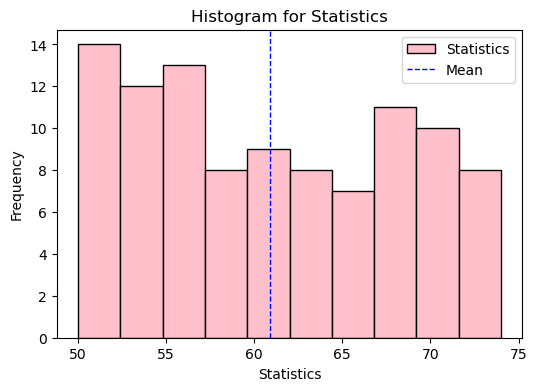

Skewness of 'Statistics': 0.21
Outliers in 'Statistics': 0
Empty DataFrame
Columns: [Statistics]
Index: []
----------------------------------------


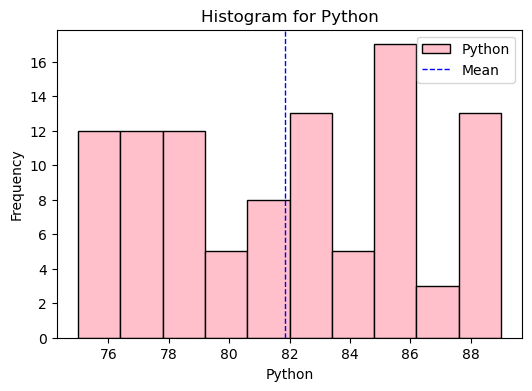

Skewness of 'Python': 0.12
Outliers in 'Python': 0
Empty DataFrame
Columns: [Python]
Index: []
----------------------------------------


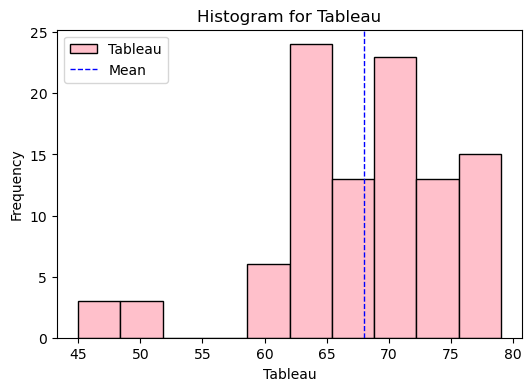

Skewness of 'Tableau': -1.01
Outliers in 'Tableau': 6
    Tableau
3        45
7        50
17       50
87       50
93       46
97       46
----------------------------------------


In [6]:
# Task 3
from scipy.stats import skew
import matplotlib.pyplot as plt

# Loop through numeric columns
for col in d.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    d[col].plot(kind='hist', bins=10, color='pink', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {col}")

    # Compute skewness
    col_skewness = d[col].skew()
    plt.axvline(d[col].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
    plt.legend()
    plt.show()

    # Print skewness
    print(f"Skewness of '{col}': {col_skewness:.2f}")
    
    # Detect outliers using IQR
    Q1 = d[col].quantile(0.25)
    Q3 = d[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = d[(d[col] < Q1 - 1.5 * IQR) | (d[col] > Q3 + 1.5 * IQR)]
    print(f"Outliers in '{col}': {len(outliers)}")
    print(outliers[[col]])
    print('-' * 40)


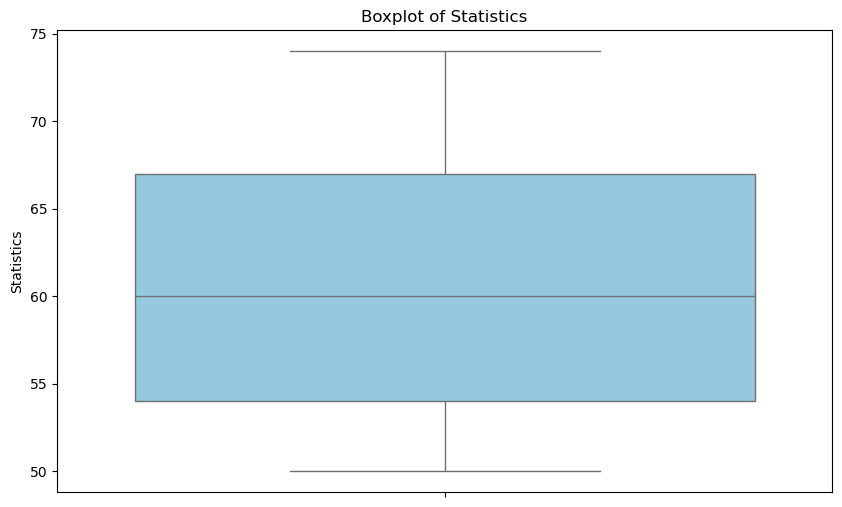

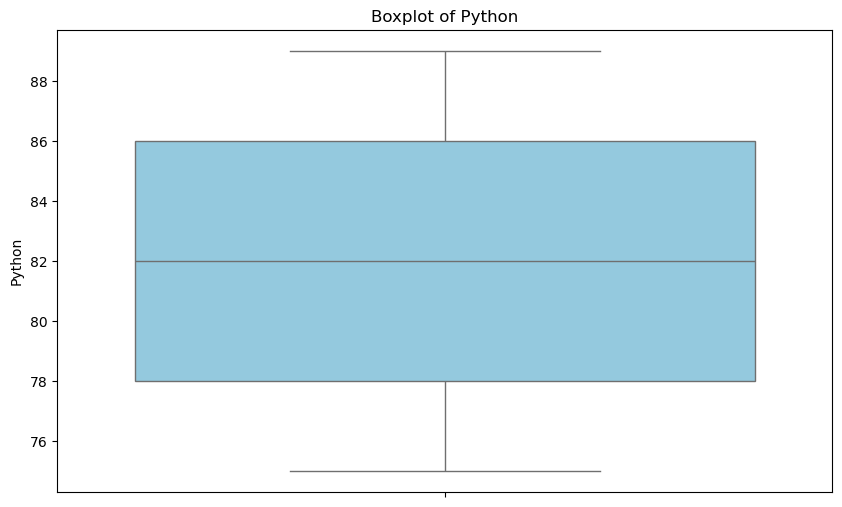

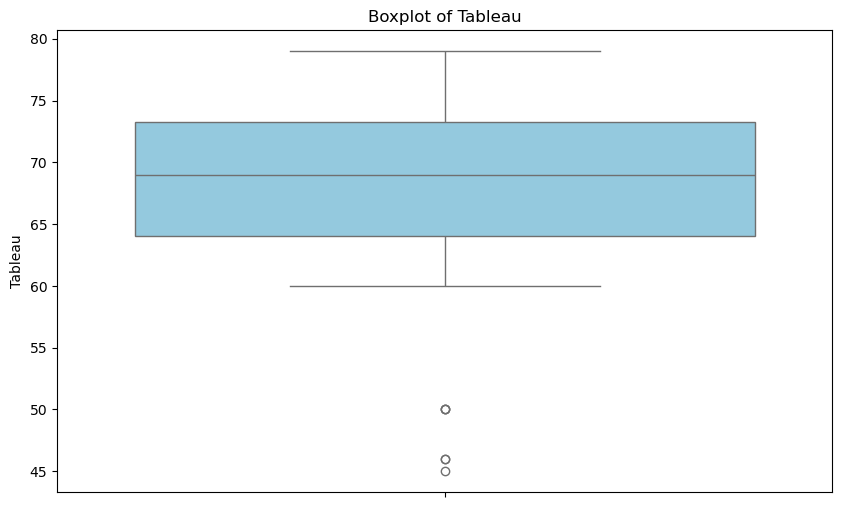

In [7]:
# Task 4
for i in d.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=d[i], color = "skyblue")
    plt.title(f"Boxplot of {i}")
    plt.ylabel(i)
    plt.show()



# There are no outliers in STATISTICS AND PYTHON but there outliers in TABLEAU

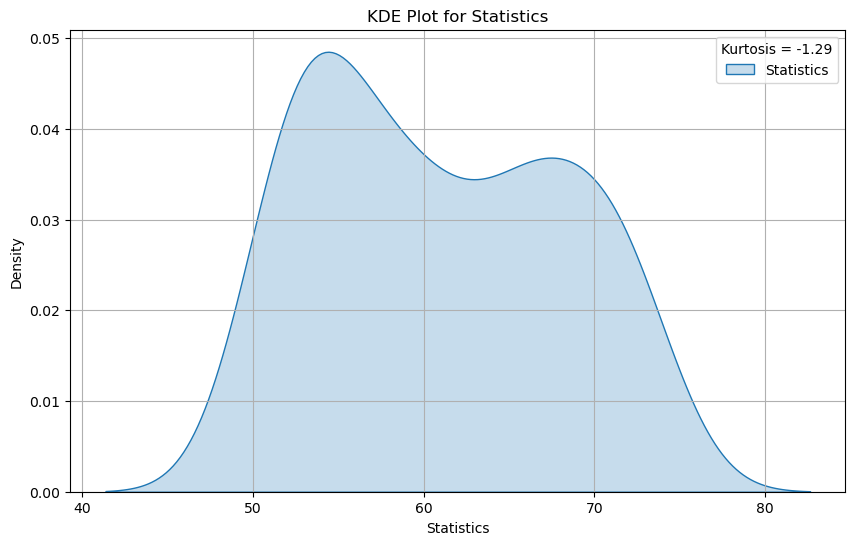

Kurtosis for 'Statistics': -1.29


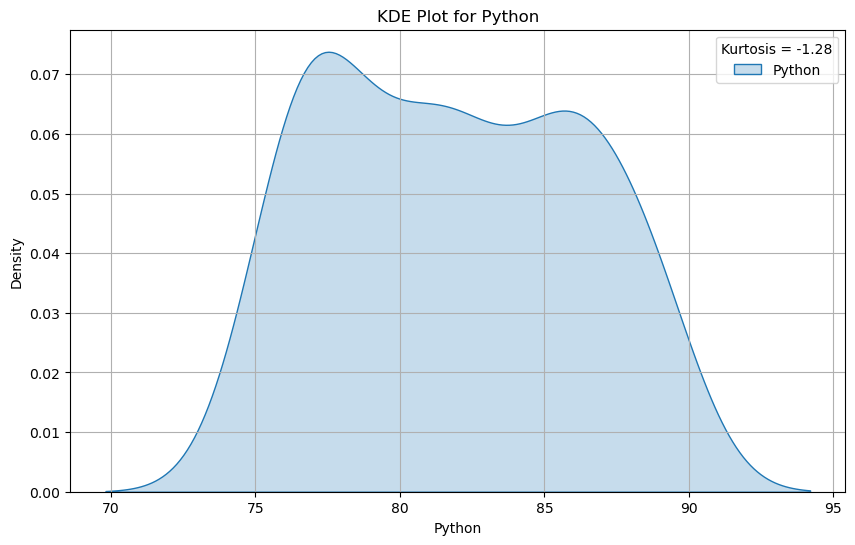

Kurtosis for 'Python': -1.28


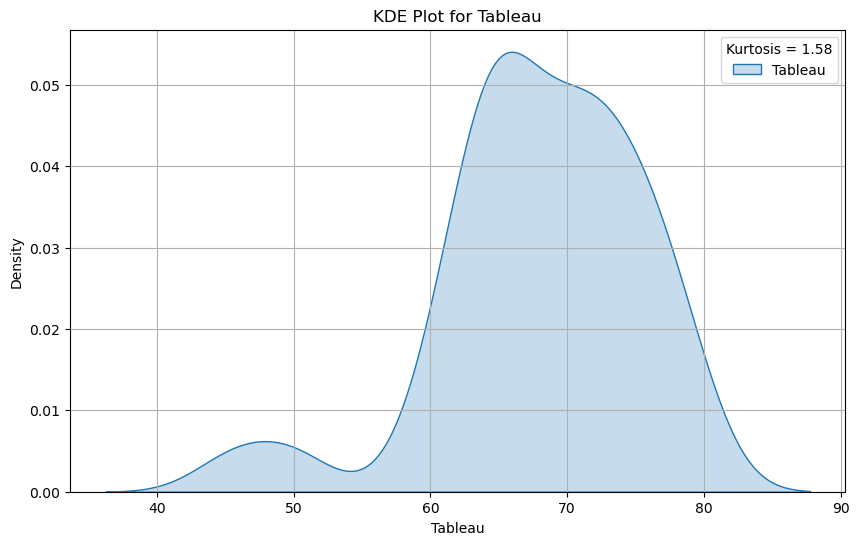

Kurtosis for 'Tableau': 1.58


In [20]:
# Task 5
from scipy.stats import kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through numeric columns
for col in d.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(x=d[col], fill=True, label=f"{col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.title(f"KDE Plot for {col}")
    
    # Compute and show kurtosis
    col_kurt = d[col].kurtosis()
    plt.legend(title=f"Kurtosis = {col_kurt:.2f}")
    plt.grid(True)
    plt.show()

    print(f"Kurtosis for '{col}': {col_kurt:.2f}")

plt.show()